In [1]:
import os
import sys

import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[['773869', '767541', '767542', '717447', '717446', '717445', '773062', '767620', '737529', '717816', '765604', '767471', '716339', '773906', '765273', '716331', '771667', '716337', '769953', '769402', '769403', '769819', '769405', '716941', '717578', '716960', '717804', '767572', '767573', '773012', '773013', '764424', '769388', '716328', '717819', '769941', '760987', '718204', '718045', '769418', '768066', '772140', '773927', '760024', '774012', '774011', '767609', '769359', '760650', '716956', '769831', '761604', '717495', '716554', '773953', '767470', '716955', '764949', '773954', '767366', '769444', '773939', '774067', '769443', '767750', '767751', '767610', '773880', '764766', '717497', '717490', '717491', '717492', '717493', '765176', '717498', '717499', '765171', '718064', '718066', '765164', '769431', '769430', '717610', '767053', '767621', '772596', '772597', '767350', '767351', '716571', '773023', '767585', '773024', '717483', '718379', '717481', '717480', '717486', '764120'

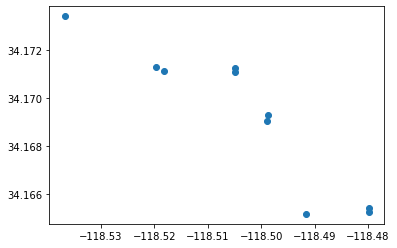

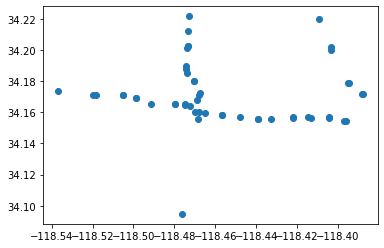

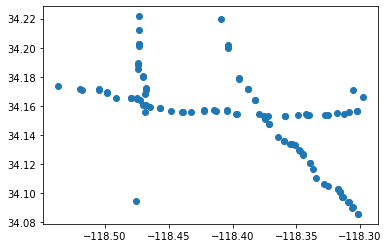

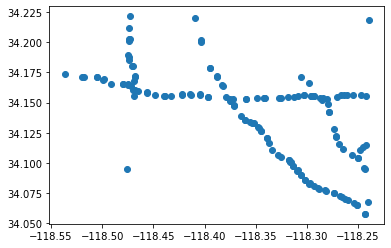

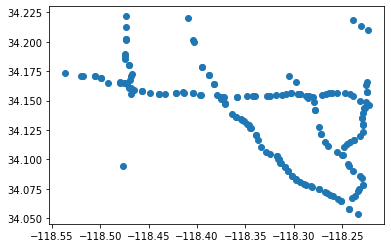

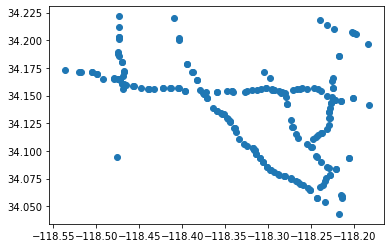

In [2]:
def generate_partial_graphs(dataname):
    if dataname == 'METR-LA':
        datadir = '../data/traffic/data/{}'.format(dataname)
        adj_mx_f = '../data/traffic/data/sensor_graph/adj_mx.pkl'
    else:
        datadir = '../data/traffic/data/{}'.format(dataname)
        adj_mx_f = '../data/traffic/data/sensor_graph/adj_mx_bay.pkl'
    with open(adj_mx_f, 'rb') as f:
        adj_mx = pkl.load(f, encoding='latin1')
    print(adj_mx)

    if dataname == 'METR-LA':
        sensor_locations = np.genfromtxt('../data/traffic/data/sensor_graph/graph_sensor_locations.csv', delimiter=',', skip_header=1)
        for t in range(sensor_locations.shape[0]):
            assert int(sensor_locations[t, 1]) == int(adj_mx[0][t])
    else:
        sensor_locations = np.genfromtxt('../data/traffic/data/sensor_graph/graph_sensor_locations_bay.csv', delimiter=',', skip_header=0)
        for t in range(sensor_locations.shape[0]):
            assert int(sensor_locations[t, 0]) == int(adj_mx[0][t])

    # sort all sensors via longitude
    long_sorted_sensors = np.argsort(sensor_locations[:, -1])
    long_sorted_sensors

    resdict = {}
    for ratio in [0.05, 0.25, 0.5, 0.75, 0.9, 1.0]:
        num_nodes = np.round(len(long_sorted_sensors) * ratio).astype(int)
        selected_nodes = sorted(long_sorted_sensors[:num_nodes])
        unselected_nodes = sorted(long_sorted_sensors[num_nodes:])
        print(selected_nodes, unselected_nodes)
        selected_edges = adj_mx[2][selected_nodes, :][:, selected_nodes]
        print(selected_edges)
        print((selected_edges > 0).astype(int).sum())

        plt.figure()
        x, y = sensor_locations[selected_nodes][:, -2], sensor_locations[selected_nodes][:, -1]
        plt.scatter(y, x)
        
        if ratio < 1:
            resdict[str(ratio)] = (selected_nodes, unselected_nodes)
    np.savez('../data/traffic/data/sensor_graph/{}_partial_nodes.npz'.format(dataname), **resdict)
    
generate_partial_graphs('METR-LA')

402369', '402370', '402371', '402372', '402373', '403225', '403265', '403329', '403401', '403402', '403404', '403406', '403409', '403412', '403414', '403419', '404370', '404434', '404435', '404444', '404451', '404452', '404453', '404461', '404462', '404521', '404522', '404553', '404554', '404585', '404586', '404640', '404753', '404759', '405613', '405619', '405701', '407150', '407151', '407152', '407153', '407155', '407157', '407161', '407165', '407172', '407173', '407174', '407176', '407177', '407179', '407180', '407181', '407184', '407185', '407186', '407187', '407190', '407191', '407194', '407200', '407202', '407204', '407206', '407207', '407321', '407323', '407325', '407328', '407331', '407332', '407335', '407336', '407337', '407339', '407341', '407342', '407344', '407348', '407352', '407359', '407360', '407361', '407364', '407367', '407370', '407372', '407373', '407374', '407710', '407711', '408907', '408911', '409524', '409525', '409526', '409528', '409529', '413026', '413845', '

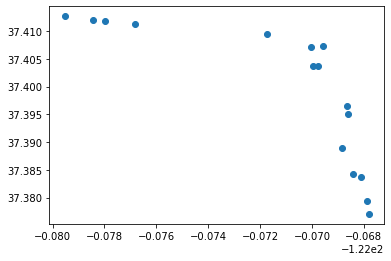

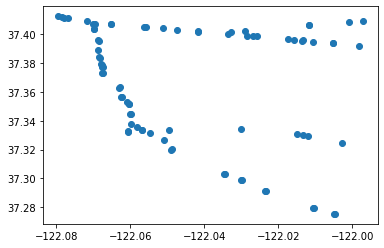

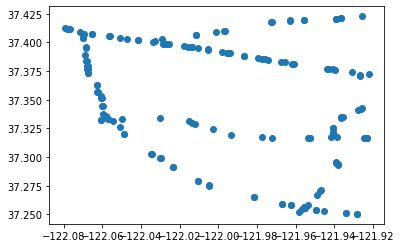

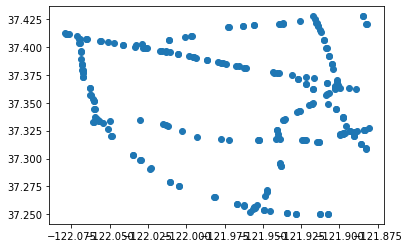

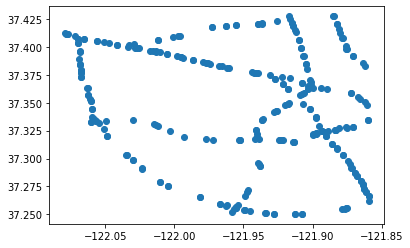

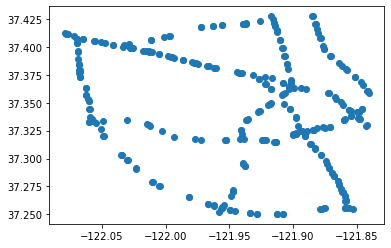

In [3]:
generate_partial_graphs('PEMS-BAY')

In [4]:
x = np.load('../data/traffic/data/sensor_graph/METR-LA_partial_nodes.npz', allow_pickle=True)
s, us = x['0.25']

In [5]:
x = np.load('../data/traffic/data/METR-LA/train.npz')
for k in x:
    print(k, x[k].shape)
print(list(x.keys()))

x (23974, 12, 207, 2)
y (23974, 12, 207, 2)
x_offsets (12, 1)
y_offsets (12, 1)
['x', 'y', 'x_offsets', 'y_offsets']
